# 📊 Análise de Vendas – Projeto Pessoal
> Feito por Samantha Carrasco


Este projeto é parte da minha formação em **Ciência de Dados (UNIVESP)** e **Desenvolvimento de Sistemas (FAT)**. O objetivo é explorar uma base de dados de vendas fictícia e aplicar conceitos básicos de análise de dados com Python.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [33]:
# Carregar os dados
df = pd.read_csv('/content/vendas.csv')
df.head()

,Data,Produto,Região,Quantidade,Receita
0,2023-03-02,Produto B,Centro-Oeste,17,6635.78
1,2023-01-03,Produto C,Nordeste,17,5953.23
2,2024-06-03,Produto A,Sul,17,7734.32
3,2024-05-28,Produto B,Centro-Oeste,12,5529.48
4,2023-05-20,Produto A,Sul,9,1568.25


## 📌 Análise Descritiva

In [24]:
# Verificar informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        200 non-null    datetime64[ns]
 1   Produto     200 non-null    object        
 2   Região      200 non-null    object        
 3   Quantidade  200 non-null    int64         
 4   Receita     200 non-null    float64       
 5   Mes         200 non-null    period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(2), period[M](1)
memory usage: 9.5+ KB


In [23]:
# Estatísticas básicas
df.describe()

,Data,Quantidade,Receita
count,200,200.000000,200.00000
mean,2023-09-23 02:02:24,10.250000,2660.03100
min,2023-01-03 00:00:00,1.000000,55.65000
25%,2023-04-26 18:00:00,5.000000,1038.04000
50%,2023-09-17 12:00:00,10.000000,1945.54000
75%,2024-02-14 00:00:00,15.000000,3695.74500
max,2024-06-22 00:00:00,20.000000,9491.60000
std,NaN,5.741281,2162.95696


## 📈 Receita por Mês

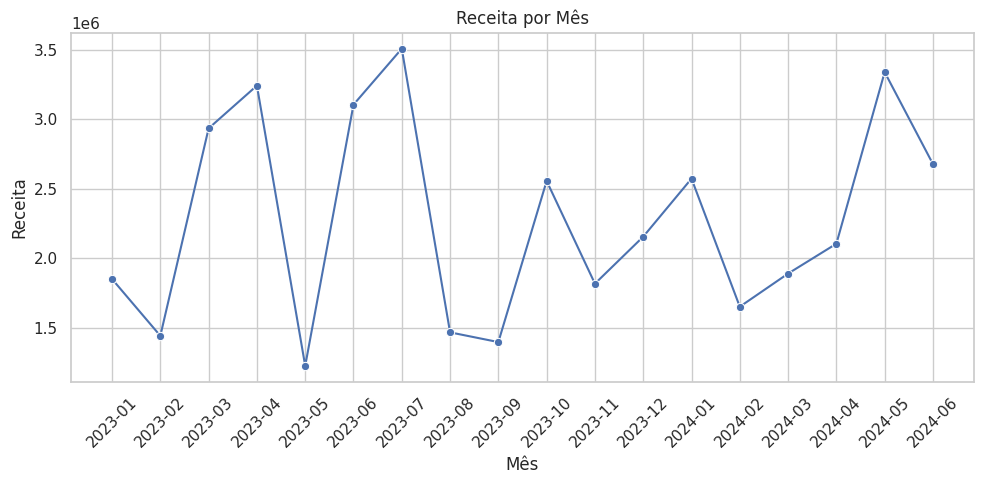

In [34]:
# Agrupar receita por mês
df['Data'] = pd.to_datetime(df['Data'])
df['Mes'] = df['Data'].dt.to_period('M')

# Corrigir tipo da coluna Receita (caso ainda não tenha feito)
df['Receita'] = (
    df['Receita']
    .astype(str)
    .str.replace('R\$', '', regex=True)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .str.strip()
)
df['Receita'] = pd.to_numeric(df['Receita'], errors='coerce')

# Agrupar
receita_mensal = df.groupby('Mes')['Receita'].sum().reset_index()

# 🔧 Converter 'Mes' para string para evitar erro com Seaborn
receita_mensal['Mes'] = receita_mensal['Mes'].astype(str)

# Plotar gráfico
plt.figure(figsize=(10,5))
sns.lineplot(data=receita_mensal, x='Mes', y='Receita', marker='o')
plt.title('Receita por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('grafico_receita_por_mes.png', dpi=300, bbox_inches='tight')
plt.show()

## ✅ Conclusões

- Identificamos os meses com maior volume de vendas.
- Visualizamos padrões sazonais na receita.
- Este projeto é um ponto de partida para análises mais avançadas.